### Quantitative Metrics for Model Evaluation

**Objective:**

  - Calculate key evaluation metrics to assess model prediction performance on the test set.
  - Understand RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error) as primary metrics for RUL prediction.
  - Implement metric calculations using the test dataset and previously trained model predictions.

#### 1. Imports and Setup

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
import matplotlib.pyplot as plt

# Suppress warnings for clearer output
import warnings
warnings.filterwarnings('ignore')

#### 2. Explanation: Evaluation Metrics for Regression (RUL Prediction)


2.1 Root Mean Squared Error (RMSE):
- RMSE measures the square root of the average squared differences between predicted and actual values.
- It penalizes larger errors more heavily, making it sensitive to outliers.
- Lower RMSE indicates better model performance.

Formula: RMSE = sqrt( (1/N) * Σ(y_true_i - y_pred_i)^2 )

2.2 Mean Absolute Error (MAE):
- MAE measures the average absolute differences between predicted and actual values.
- It provides a straightforward interpretation of average error magnitude.
- Less sensitive to large errors compared to RMSE.

Formula: MAE = (1/N) * Σ|y_true_i - y_pred_i|


#### 3. Load Test Data and Previous Model

In [2]:
# Assuming test data (X_test, y_test) and trained model saved as "best_lstm_model.keras"
# Load test features and labels
X_test = np.load("rolling_window_sequences.npy")  # Replace with actual file path
metadata_test = pd.read_csv("sequence_metadata_with_RUL.csv")  # Replace with actual file path
y_test = metadata_test["RUL"].values

print("Test feature shape:", X_test.shape)
print("Test target shape:", y_test.shape)

# Load trained LSTM model
model = tf.keras.models.load_model("best_model.keras")

FileNotFoundError: [Errno 2] No such file or directory: 'rolling_window_sequences.npy'

#### 4. Generate Predictions on Test Set

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()  # Flatten to 1-D array for metric calculations

print("Predictions shape:", y_pred.shape)

551/551 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predictions shape: (17631,)


#### 5. Calculate RMSE and MAE

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Root Mean Squared Error (RMSE): 4.8715
Mean Absolute Error (MAE): 3.3697


#### 6. Visualize Predicted vs Actual RUL

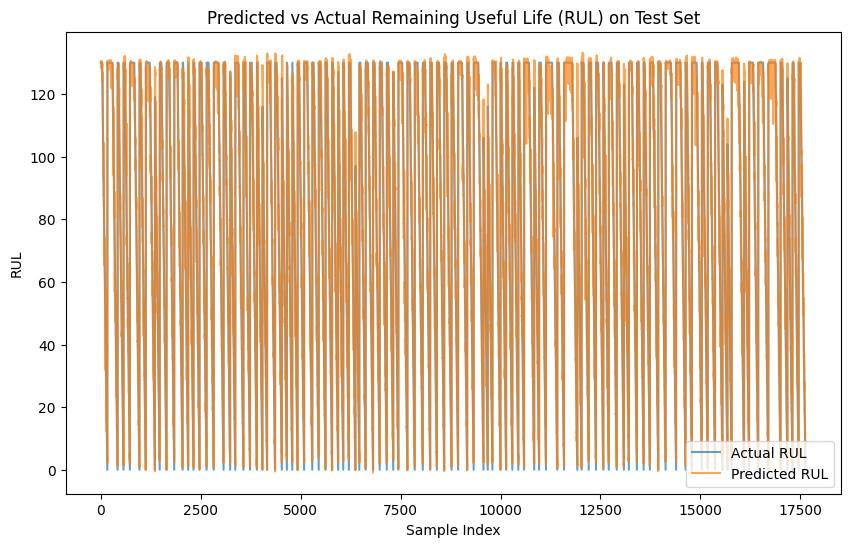

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual RUL', alpha=0.7)
plt.plot(y_pred, label='Predicted RUL', alpha=0.7)
plt.title('Predicted vs Actual Remaining Useful Life (RUL) on Test Set')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.show()

Graph Interpretation:

        1) Strong Performance: The orange line closely follows the light blue line for most of the graph. This indicates that the model is highly accurate

        2) Low Error: Given how tightly the predicted line follows the actual line, the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) calculated in the previous step should be relatively low, confirming a well-performing model.